In [1]:
#Installing the textblob and word cloud
!pip install wordcloud
!pip install textblob


     |████████████████████████████████| 366 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 636 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 8.3 MB/s  eta 0:00:01
     |████████████████████████████████| 722 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 6.3 MB/s  eta 0:00:01


In [2]:
#importing all necessary packages
from textblob import TextBlob
import csv
import re
import operator
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [6]:
#Reading the csv file
df = pd.read_csv(r"newtwitter.small.csv")
df.head(5)

,tweet,po,pot
0,#NewTwitter kya apa to emg'e?? ga isa nyoba ne...,2616580673,18537
1,to gostando do #newtwitter ... :D,2708101970,18546
2,What Is Going On With This #NewTwitter? I Have...,2708237856,18547
3,RT @lizzieanderton: I cant access the new twit...,2617786777,18537
4,The #newtwitter is so weird. Seriously. Why is...,2603135146,18536


In [7]:
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.tweet:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "

In [8]:
# Intialize an empty list to hold all of our tweets
tweets = []


# A helper function that removes all the non ASCII characters
# from the given string. Retuns a string with only ASCII characters.
def strip_non_ascii(string):
    ''' Returns the string without non ASCII characters'''
    stripped = (c for c in string if 0 < ord(c) < 127)
    return ''.join(stripped)

In [9]:
# LOAD AND CLEAN DATA
with open('newtwitter.small.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:

        tweet= dict()
        tweet['orig'] = row[0]
        tweet['id'] = int((row[1]))
        tweet['pubdate'] = int(row[2])

        # Ignore retweets
        if re.match(r'^RT.*', tweet['orig']):
            continue

        tweet['clean'] = tweet['orig']

        # Remove all non-ascii characters
        tweet['clean'] = strip_non_ascii(tweet['clean'])

        # Normalize case
        tweet['clean'] = tweet['clean'].lower()

        # Remove URLS. (I stole this regex from the internet.)
        tweet['clean'] = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', tweet['clean'])

        # Fix classic tweet lingo
        tweet['clean'] = re.sub(r'\bthats\b', 'that is', tweet['clean'])
        tweet['clean'] = re.sub(r'\bive\b', 'i have', tweet['clean'])
        tweet['clean'] = re.sub(r'\bim\b', 'i am', tweet['clean'])
        tweet['clean'] = re.sub(r'\bya\b', 'yeah', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcant\b', 'can not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwont\b', 'will not', tweet['clean'])
        tweet['clean'] = re.sub(r'\bid\b', 'i would', tweet['clean'])
        tweet['clean'] = re.sub(r'wtf', 'what the fuck', tweet['clean'])
        tweet['clean'] = re.sub(r'\bwth\b', 'what the hell', tweet['clean'])
        tweet['clean'] = re.sub(r'\br\b', 'are', tweet['clean'])
        tweet['clean'] = re.sub(r'\bu\b', 'you', tweet['clean'])
        tweet['clean'] = re.sub(r'\bk\b', 'OK', tweet['clean'])
        tweet['clean'] = re.sub(r'\bsux\b', 'sucks', tweet['clean'])
        tweet['clean'] = re.sub(r'\bno+\b', 'no', tweet['clean'])
        tweet['clean'] = re.sub(r'\bcoo+\b', 'cool', tweet['clean'])
        # Create textblob object
        tweet['TextBlob'] = TextBlob(tweet['clean'])

     

        tweets.append(tweet)

In [10]:


for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] >= 0.1:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] <= -0.1:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])

In [11]:
for tweet in tweets:
    tweet['polarity'] = float(tweet['TextBlob'].sentiment.polarity)
    tweet['subjectivity'] = float(tweet['TextBlob'].sentiment.subjectivity)

    if tweet['polarity'] >= 0.1:
        tweet['sentiment'] = 'positive'
    elif tweet['polarity'] <= -0.1:
        tweet['sentiment'] = 'negative'
    else:
        tweet['sentiment'] = 'neutral'

tweets_sorted = sorted(tweets, key=lambda k: k['polarity'])

In [12]:
# EVALUATE RESULTS

# First, print out a few example tweets from each sentiment category.

print ("\n\nTOP NEGATIVE TWEETS")
negative_tweets = [d for d in tweets_sorted if d['sentiment'] == 'negative']
for tweet in negative_tweets[0:100]:
    print ("id=%d, polarity=%.2f, clean=%s" % (tweet['id'], tweet['polarity'], tweet['clean']))

print ("\n\nTOP POSITIVE TWEETS")
positive_tweets = [d for d in tweets_sorted if d['sentiment'] == 'positive']
for tweet in positive_tweets[-100:]:
    print ("id=%d, polarity=%.2f, clean=%s" % (tweet['id'], tweet['polarity'], tweet['clean']))

print ("\n\nTOP NEUTRAL TWEETS")
neutral_tweets = [d for d in tweets_sorted if d['sentiment'] == 'neutral']
for tweet in neutral_tweets[0:500]:
    print ("id=%d, polarity=%.2f, clean=%s" % (tweet['id'], tweet['polarity'], tweet['clean']))



TOP NEGATIVE TWEETS
id=2697983477, polarity=-0.78, clean=i don't like the #newtwitter, this version is weird!!
id=2707893267, polarity=-0.75, clean=arghhhh...esse #newtwitter ? mtooo chato! :(
id=2697821842, polarity=-0.70, clean=fuck'n #newtwitter you bad ass.!!!
id=2718649841, polarity=-0.65, clean=is there not a url shortening service built into #newtwitter? am i blind? stupid? both?
id=2717383858, polarity=-0.62, clean=shit! el #newtwitter es horrible!!
id=2716533010, polarity=-0.50, clean=not trying #newtwitter again till the #fail phase is over.
id=2616580673, polarity=-0.31, clean=#newtwitter kya apa to emg'e?? ga isa nyoba new twitter dr laptop~ =(
id=2718115792, polarity=-0.30, clean=i like the #newtwitter but its slow
id=2697708251, polarity=-0.30, clean=pq meu twitter t? no #newtwitter?  sucks...
id=2658714519, polarity=-0.25, clean=how to customise your background for the #newtwitter  [blog] <-- i need to get round to this!
id=2673387653, polarity=-0.22, clean=i'm here on

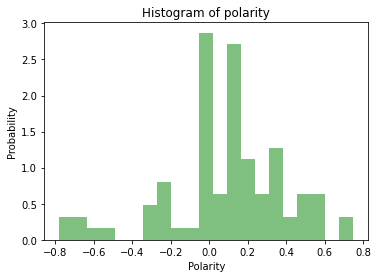

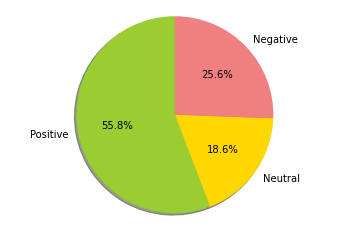

In [13]:
#creating some plots
# A histogram of the scores.
x = [d['polarity'] for d in tweets_sorted]
num_bins = 21
n, bins, patches = plt.hist(x, num_bins, density=1, facecolor='green', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Probability')
plt.title(r'Histogram of polarity')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()



# A pie chart showing the number of tweets in each sentiment category

pos = len(positive_tweets)
neu = len(negative_tweets)
neg = len(neutral_tweets)
labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neu, neg]
colors = ['yellowgreen', 'gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [14]:
negative_tweets.to_csv("negetive_tweets.csv")
positive_tweet=pd.DataFrame(positive_tweets,columns=['id','polarity','clean'])
positive_tweets.to_csv("positive_tweets.csv")
negetive_tweet=pd.DataFrame(neutral_tweets,columns=['id','polarity','clean'])
negetive_tweets.to_csv("negetive_tweets.csv")

AttributeError: 'list' object has no attribute 'to_csv'